<a href="https://colab.research.google.com/github/FlaminTech98/rabitsleep_advise/blob/main/Python_code_of_Sleep_Health_project_from_RabiTee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Recommendation Sleep Advise with Machine Learning**



### In this project, I will analyse a dataset including sleep patterns, lifestyle factors. Using this data, I will build a model to give advise for those who have sleep troubles.

**1. Problem Definition**:

Build a model to give sleep advises based on their sleep behaviors. Use data analysis to understand how different aspects of sleep health related to the occurence of sleep and offer potential solutions for better sleep.

**2. Data:**

https://bit.ly/sleepdatasetAug2023

**3. Features:**

The dataset contains the following features:


*   ID: An identifier for each one. (datetime)
*   Age: The age of s person. (years old)
* Time go to sleep: The time that a person goes to bed. (Time in hours)
* Sleep duration: The number of hours the person sleeps per day. (hours)
*Sleep latency: The numbers of minutes that make a person falls asleep. (minutes)
* Time awake: The number of minutes that a person awakes before sleeping. (minutes)

***Sleep patterns: (frequency)***

* Headache: The numbers of frequency per week that a person feesl headache.

* Feeling cold/hot: The numbers of frequency per week that a person feels too cold or hot during the night.
* Hard to breath: The numbers of frequency per week that a person feel hard to breath during sleeping.

* Nightmare: The numbers of frequency per week that a person has nightmare.

* Cough/snore: The numbers of frequency per week that a person coughs or snores during sleeping.

* Frequency awake at night: The numbers of frequency per week that a person awake suddenly at night.







**4. Preparing the tools**

I'm going to use Pandas, Matplotlib and NumPy for data analysis and sklearn for modeling.

# Mục mới

In [68]:
# import all the tools we need

# Reglur EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, average_precision_score
from sklearn.metrics import roc_curve, accuracy_score, f1_score, make_scorer

**Exploratory Data Analysis (EDA)**

In [69]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset (1).csv


In [70]:
import io
data = io.BytesIO(uploaded['Dataset (1).csv'])

In [72]:
df = pd.read_csv("Dataset (1).csv")

**1) Data Summary**

I will present a concise overview of the dataset, including key statistics and information about each feature. The data summary will provide a quick understanding of the dataset.

In [73]:
del df['ID']

In [74]:
df.head()

,Age,Time go to sleep,Sleep Duration,Sleep latency,Awaking time before sleeping,Frequency awake at night,Hard to breath,Headache,Nightmare,Cough/ Snore,Feeling cold/hot
0,20,After 0h,8.1,15.0,17,1_2,0,0,0,0,1_2
1,25,After 0h,6.0,10.0,35,0,0,0,0,3+,0
2,21,23h_0h,6.1,15.0,50,1_2,0,0,1_2,1_2,1_2
3,41,22h_23h,7.2,15.0,47,1_2,0,0,0,0,1_2
4,21,23h_0h,5.8,5.0,13,0,0,0,1_2,0,0


In [75]:
df.tail()

,Age,Time go to sleep,Sleep Duration,Sleep latency,Awaking time before sleeping,Frequency awake at night,Hard to breath,Headache,Nightmare,Cough/ Snore,Feeling cold/hot
145,48,23h_0h,5.8,15.0,87,1_2,0,0,0,0,0
146,17,23h_0h,5.6,30.0,79,1_2,0,3+,0,1_2,0
147,34,22h_23h,5.0,15.0,98,0,1_2,0,0,0,1_2
148,12,22h_23h,5.6,15.0,47,0,0,0,0,0,0
149,19,22h_23h,8.0,15.0,65,0,0,0,1_2,0,0


In [76]:
df.shape

(150, 11)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           150 non-null    int64  
 1   Time go to sleep              150 non-null    object 
 2   Sleep Duration                150 non-null    float64
 3   Sleep latency                 150 non-null    float64
 4   Awaking time before sleeping  150 non-null    int64  
 5   Frequency awake at night      150 non-null    object 
 6   Hard to breath                149 non-null    object 
 7   Headache                      150 non-null    object 
 8   Nightmare                     148 non-null    object 
 9   Cough/ Snore                  150 non-null    object 
 10  Feeling cold/hot              149 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 13.0+ KB


In [78]:
df.isna().sum()

Age                             0
Time go to sleep                0
Sleep Duration                  0
Sleep latency                   0
Awaking time before sleeping    0
Frequency awake at night        0
Hard to breath                  1
Headache                        0
Nightmare                       2
Cough/ Snore                    0
Feeling cold/hot                1
dtype: int64

# **2) Data distribution**

I will use charts to visualize the distribution of the data. This help us to understand how many of each class there.

**1. First, I have to put the null data (empty data) away from the dataset.**

<Axes: >

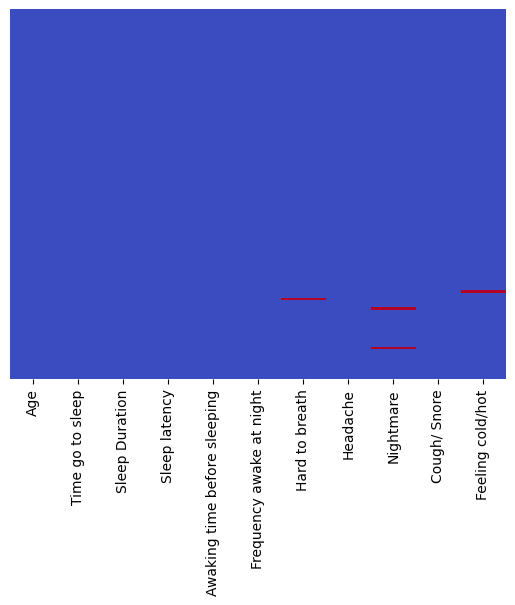

In [80]:
sns.heatmap(df.isnull(),yticklabels = False, cbar= False, cmap= 'coolwarm')

In [81]:
df = df.dropna(how='any')
df

,Age,Time go to sleep,Sleep Duration,Sleep latency,Awaking time before sleeping,Frequency awake at night,Hard to breath,Headache,Nightmare,Cough/ Snore,Feeling cold/hot
0,20,After 0h,8.1,15.0,17,1_2,0,0,0,0,1_2
1,25,After 0h,6.0,10.0,35,0,0,0,0,3+,0
2,21,23h_0h,6.1,15.0,50,1_2,0,0,1_2,1_2,1_2
3,41,22h_23h,7.2,15.0,47,1_2,0,0,0,0,1_2
4,21,23h_0h,5.8,5.0,13,0,0,0,1_2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
145,48,23h_0h,5.8,15.0,87,1_2,0,0,0,0,0
146,17,23h_0h,5.6,30.0,79,1_2,0,3+,0,1_2,0
147,34,22h_23h,5.0,15.0,98,0,1_2,0,0,0,1_2
148,12,22h_23h,5.6,15.0,47,0,0,0,0,0,0


In [82]:
df.shape

(146, 11)

['Age', 'Sleep Duration', 'Sleep latency', 'Awaking time before sleeping']


Text(0.5, 1.0, 'Boxplot of Dimensions')

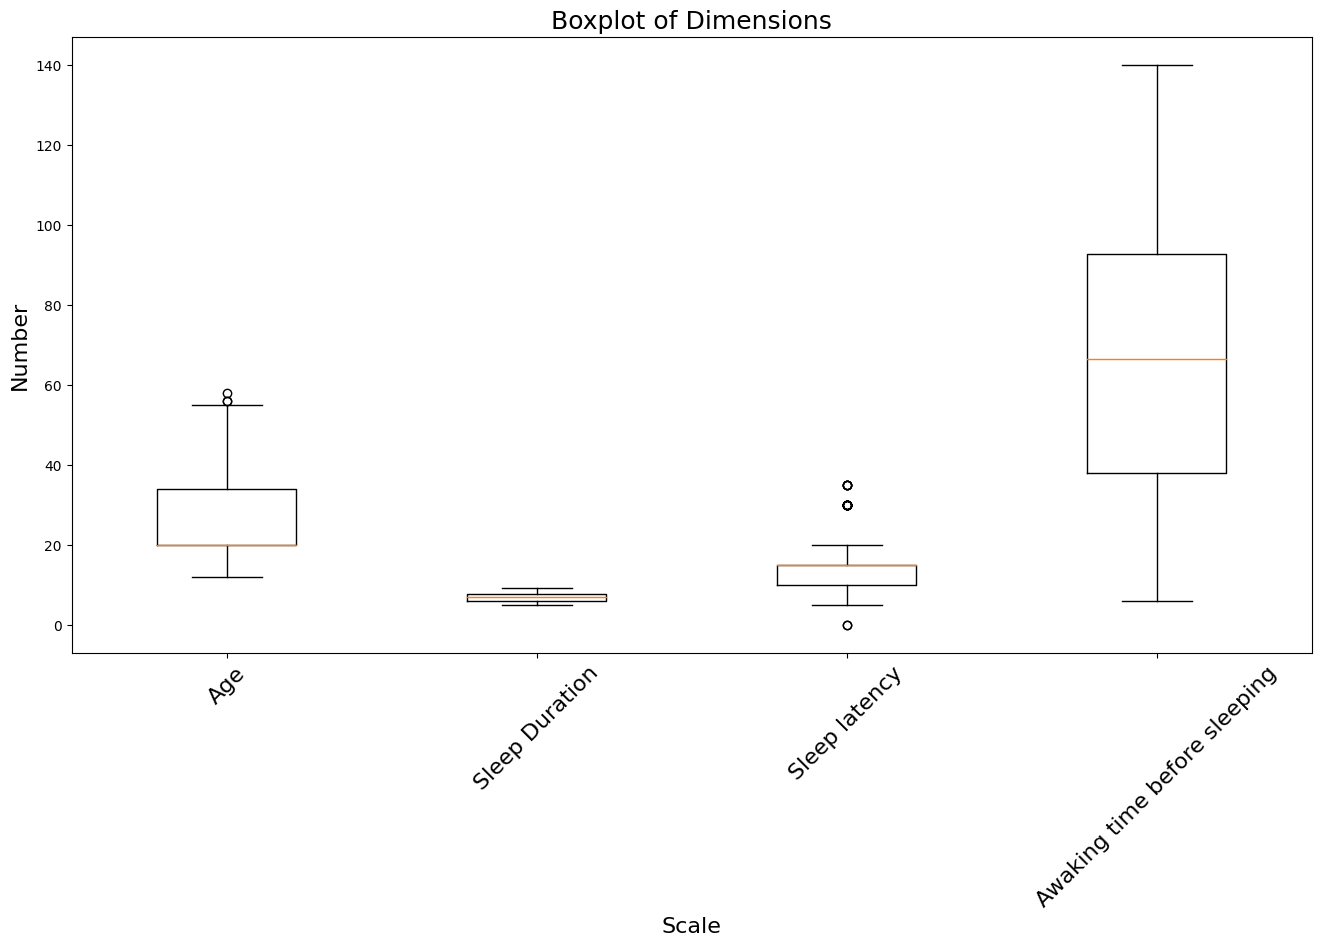

In [83]:
dims = list(df.select_dtypes('number').columns)
print(dims)

# Vẽ biểu đồ bboxplot
plt.figure(figsize=(16, 8))
plt.boxplot([df[col] for col in dims])
plt.xlabel('Scale', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.xticks(np.arange(len(dims))+1, dims, rotation=45, fontsize=16)
plt.title("Boxplot of Dimensions", fontsize=18)

In [84]:
print(np.where(df['Age']>55))

(array([126, 133, 136]),)


**2. After cleaning the data, we continue with visualizing the dataset in details.**

In [85]:
#Call the values for x, y
df_age= df['Age'].values
x, y = np.unique(df_age, return_counts= True)
print(x)
print(y)


[12 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 40 41 42 44 45 46 48 49 50 51 52 54 55 56 58]
[ 2  1  1  2  1  4 25 41  3  2  2  2  8  3  1  1  1  3  2  1  1  3  1  3
  1  1  3  3  2  3  2  4  4  1  1  1  1  2  2  1]


In [86]:
df_gosleep= df['Time go to sleep'].values
x1,y1= np.unique(df_gosleep, return_counts = True)
print(x1)
print(y1)

['22h_23h' '23h_0h' 'After 0h  ' 'Before 22h']
[42 48 45 11]


In [87]:
df_averagesleep= df['Sleep Duration'].values
x2,y2 = np.unique(df_averagesleep, return_counts= True)

print(x2)
print(y2)

[5.  5.1 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.4 6.5 6.6 6.7 6.8 6.9
 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8
 8.9 9.1 9.2]
[ 4  1  1  2  3  6  2  4  5 11  3  3  3  9  1  2  6  2 12  4  9  5  2  5
  3  3  4  3  8  3  1  3  5  1  1  1  3  1  1]


In [88]:
df_latency= df['Sleep latency'].values

x3,y3 = np.unique(df_latency, return_counts = True)
print(x3)
print(y3)

[ 0.1  5.  10.  15.  20.  30.  35. ]
[ 2 26 19 73  7 14  5]


Text(0.5, 1.0, 'Sleep latency')

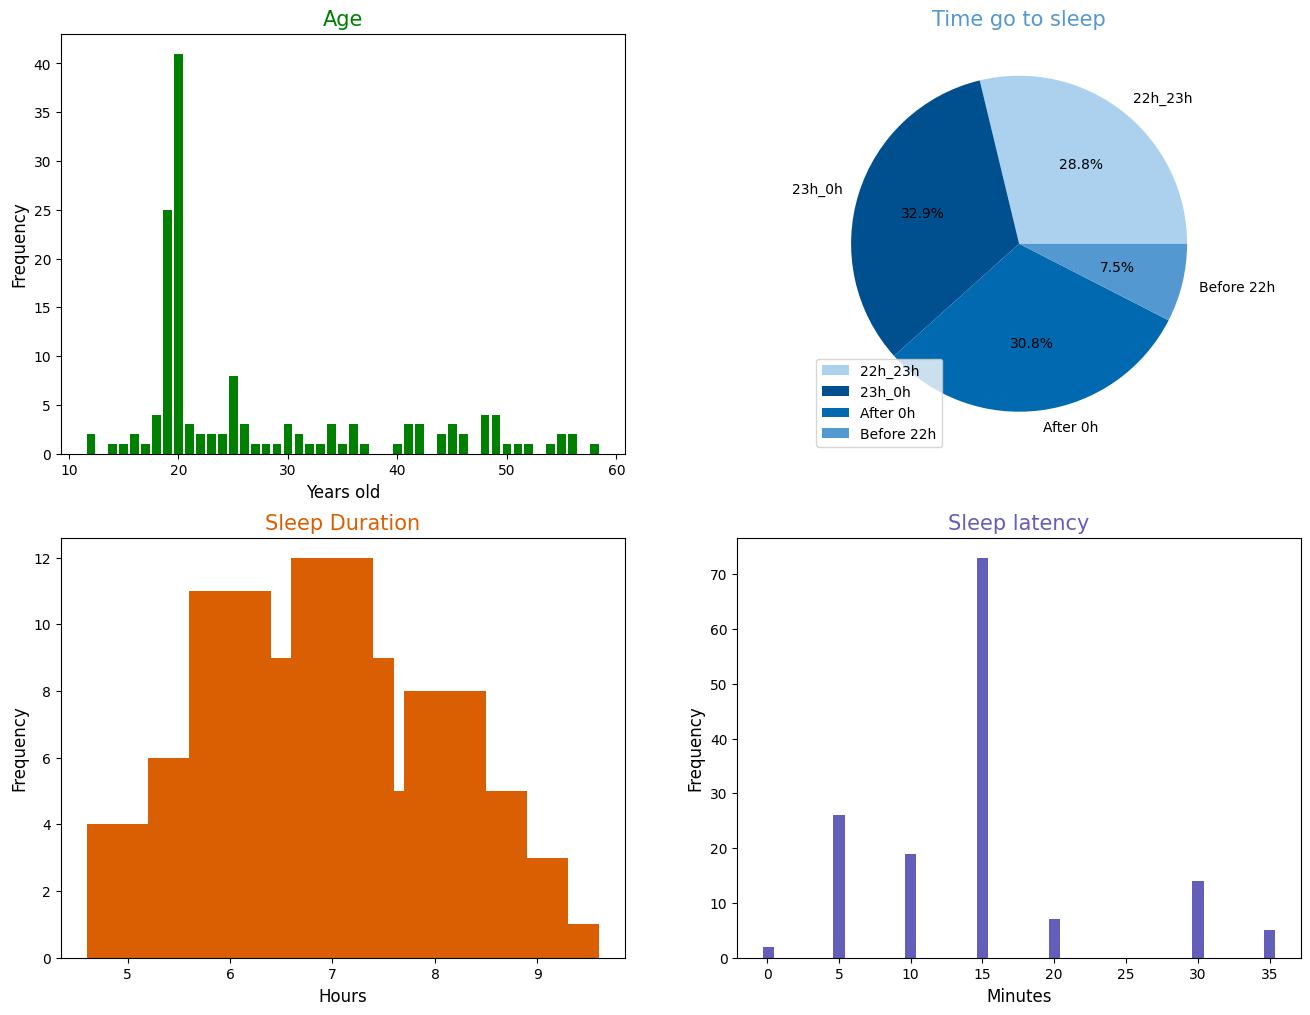

In [89]:
fg, ax = plt.subplots(2, 2, figsize=(16,12))
#Graph[0,0]
ax[0,0].bar(x,y,color = 'green' )
ax[0,0].set_xlabel('Years old', fontsize=12)
ax[0,0].set_ylabel('Frequency', fontsize=12)
ax[0,0].set_title('Age', fontsize=15, color = 'Green')
#Graph [0,1]
ax[0,1].pie(y1,labels=x1,colors =['#ABD1EE','#00508F','#0169AF','#5398D0'],autopct = '%1.1f%%', shadow=False )
ax[0,1].set_title('Time go to sleep', fontsize=15, color = '#5398D0')
ax[0,1].legend(loc='lower left')
#Graph [1,0]
ax[1,0].bar(x2,y2,color = '#D95F02' )
ax[1,0].set_xlabel('Hours', fontsize=12)
ax[1,0].set_ylabel('Frequency', fontsize=12)
ax[1,0].set_title('Sleep Duration', fontsize=15, color = '#D95F02')
#Graph [1,1]
ax[1,1].bar(x3,y3, color=['#635EBA'])
ax[1,1].set_xlabel('Minutes', fontsize=12)
ax[1,1].set_ylabel('Frequency', fontsize=12)
ax[1,1].set_title('Sleep latency', fontsize=15, color = '#635EBA')

Frequency of **6 sleeping features** including awaking during night, hard to breath,  headache, nightmare, cough/ snore, feeling hot/cold.

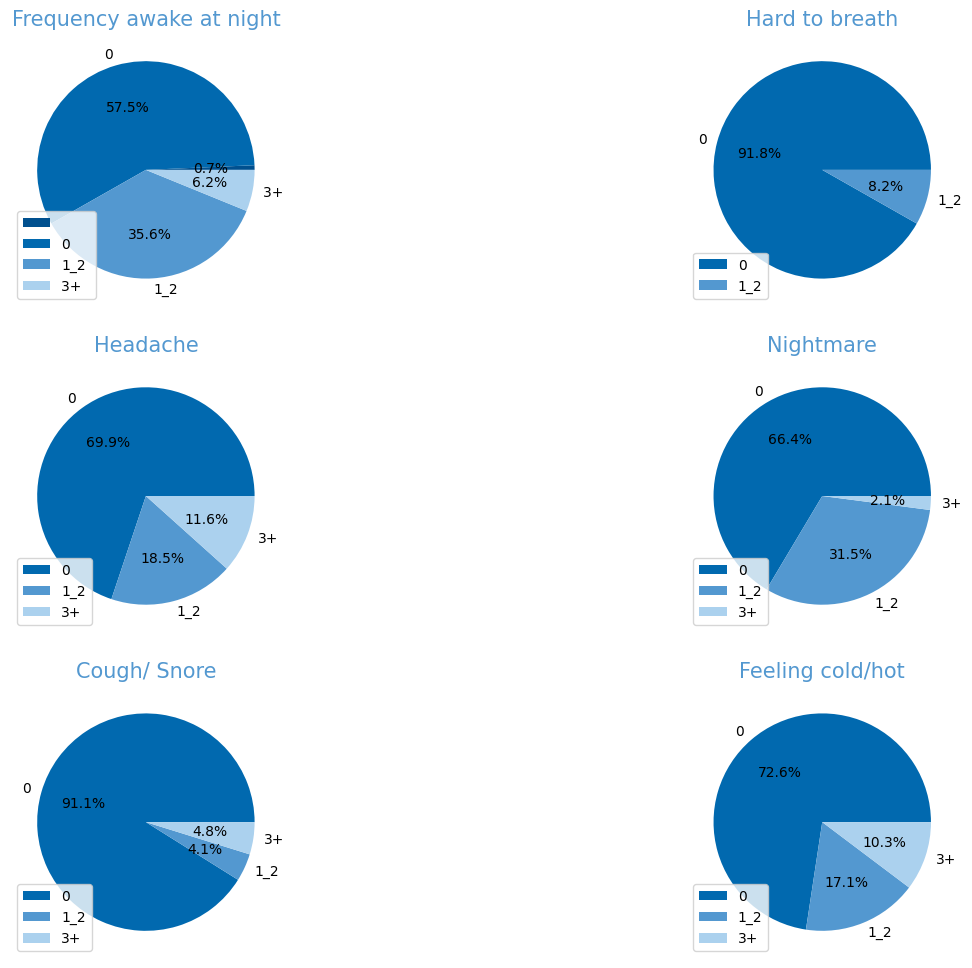

In [90]:
fg, ax = plt.subplots(3, 2, figsize=(16,12))
#Graph of Headache feature
df['Frequency awake at night'].dropna()
df_awake= df['Frequency awake at night'].values
x5, y5 = np.unique(df_awake, return_counts= True)
ax[0,0].pie(y5,labels=x5,colors =['#00508F','#0169AF','#5398D0','#ABD1EE'],autopct = '%1.1f%%', shadow=False )
ax[0,0].set_title('Frequency awake at night', fontsize=15, color = '#5398D0')
ax[0,0].legend(loc='lower left')
#Graph of Headache feature
df_breath= df['Hard to breath'].values
x6, y6 = np.unique(df_breath, return_counts= True)
ax[0,1].pie(y6,labels=x6,colors =['#0169AF','#5398D0','#ABD1EE'],autopct = '%1.1f%%', shadow=False )
ax[0,1].set_title('Hard to breath', fontsize=15, color = '#5398D0')
ax[0,1].legend(loc='lower left')
#Graph of Headache feature
df_headache= df['Headache'].values
x7, y7 = np.unique(df_headache, return_counts= True)
ax[1,0].pie(y7,labels=x7,colors =['#0169AF','#5398D0','#ABD1EE'],autopct = '%1.1f%%', shadow=False )
ax[1,0].set_title('Headache', fontsize=15, color = '#5398D0')
ax[1,0].legend(loc='lower left')
#Graph of Nightmare feature
df_Nightmare= df['Nightmare'].values
x8, y8 = np.unique(df_Nightmare, return_counts= True)
ax[1,1].pie(y8,labels=x8,colors =['#0169AF','#5398D0','#ABD1EE'],autopct = '%1.1f%%', shadow=False )
ax[1,1].set_title('Nightmare', fontsize=15, color = '#5398D0')
ax[1,1].legend(loc='lower left')
#Graph of  Cough/ Snore feature
df_cough= df['Cough/ Snore'].values
x5, y5 = np.unique(df_cough, return_counts= True)
ax[2,0].pie(y5,labels=x5,colors =['#0169AF','#5398D0','#ABD1EE'],autopct = '%1.1f%%', shadow=False )
ax[2,0].set_title('Cough/ Snore', fontsize=15, color = '#5398D0')
ax[2,0].legend(loc='lower left')
#Graph of Feeling cold/hot feature
df = df.fillna({'Feeling cold/hot':'0'})
df_feeling= df['Feeling cold/hot'].values
x5, y5 = np.unique(df_feeling, return_counts= True)
ax[2,1].pie(y5,labels=x5,colors =['#0169AF','#5398D0','#ABD1EE'],autopct = '%1.1f%%', shadow=False )
ax[2,1].set_title('Feeling cold/hot', fontsize=15, color = '#5398D0')
ax[2,1].legend(loc='lower left')




**Details of the frequency above:**

*   0 : 0 times per week
*   1_2: 1 to 2 times per week
* 3+: More than 3 times per wwek





From the dataset of six features above, it is concluded that there are **43.8%** of people frequently awoke at night, mainly once - twice a week. And the proportion of those have nightmare is **33.6%**, mainly once - twice a week.

3. I calculate the **sleep quality** (percentage) by dividing ***the real time of sleeping*** for ***the total time spending in bed*** and then multiply with 100.

In [91]:
df['Actual sleeping time'] = df['Sleep Duration']*60 - df['Sleep latency'] - df['Awaking time before sleeping']
df['Sleep efficiency'] = (df['Actual sleeping time'] / (df['Sleep Duration']*60)) *100
df

,Age,Time go to sleep,Sleep Duration,Sleep latency,Awaking time before sleeping,Frequency awake at night,Hard to breath,Headache,Nightmare,Cough/ Snore,Feeling cold/hot,Actual sleeping time,Sleep efficiency
0,20,After 0h,8.1,15.0,17,1_2,0,0,0,0,1_2,454.0,93.415638
1,25,After 0h,6.0,10.0,35,0,0,0,0,3+,0,315.0,87.500000
2,21,23h_0h,6.1,15.0,50,1_2,0,0,1_2,1_2,1_2,301.0,82.240437
3,41,22h_23h,7.2,15.0,47,1_2,0,0,0,0,1_2,370.0,85.648148
4,21,23h_0h,5.8,5.0,13,0,0,0,1_2,0,0,330.0,94.827586
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,48,23h_0h,5.8,15.0,87,1_2,0,0,0,0,0,246.0,70.689655
146,17,23h_0h,5.6,30.0,79,1_2,0,3+,0,1_2,0,227.0,67.559524
147,34,22h_23h,5.0,15.0,98,0,1_2,0,0,0,1_2,187.0,62.333333
148,12,22h_23h,5.6,15.0,47,0,0,0,0,0,0,274.0,81.547619


The percentage of **sleep efficiency**:
* x > 85%: Very good
* 70% < x < 85%: Good
* x > 70%: Need improvement.

4. Then, I evaluate the **quality of sleep** bases on 3 features: Sleep efficiency, Sleep Latency and six sleeping patterns.

In [92]:
def evaluate(row):
    if row['Sleep efficiency'] >= 85 and row['Sleep latency'] < 30 and row['Frequency awake at night'] == '0':
        return 'Good'
    if row['Sleep efficiency'] < 85 and row['Sleep latency'] >= 30:
      return 'Poor'
    if row['Sleep efficiency'] < 85 and row['Frequency awake at night'] == '3+' or row['Hard to breath']=='3+' or row['Headache']=='3+' or row['Nightmare']=='3+'or row['Cough/ Snore']=='3+'or row['Feeling cold/hot']=='3+':
      return 'Poor'
    else:
        return 'Fair'

# Apply the function to each row of your DataFrame

df['Sleep quality'] = df.apply(evaluate, axis=1)
df

,Age,Time go to sleep,Sleep Duration,Sleep latency,Awaking time before sleeping,Frequency awake at night,Hard to breath,Headache,Nightmare,Cough/ Snore,Feeling cold/hot,Actual sleeping time,Sleep efficiency,Sleep quality
0,20,After 0h,8.1,15.0,17,1_2,0,0,0,0,1_2,454.0,93.415638,Fair
1,25,After 0h,6.0,10.0,35,0,0,0,0,3+,0,315.0,87.500000,Good
2,21,23h_0h,6.1,15.0,50,1_2,0,0,1_2,1_2,1_2,301.0,82.240437,Fair
3,41,22h_23h,7.2,15.0,47,1_2,0,0,0,0,1_2,370.0,85.648148,Fair
4,21,23h_0h,5.8,5.0,13,0,0,0,1_2,0,0,330.0,94.827586,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,48,23h_0h,5.8,15.0,87,1_2,0,0,0,0,0,246.0,70.689655,Fair
146,17,23h_0h,5.6,30.0,79,1_2,0,3+,0,1_2,0,227.0,67.559524,Poor
147,34,22h_23h,5.0,15.0,98,0,1_2,0,0,0,1_2,187.0,62.333333,Fair
148,12,22h_23h,5.6,15.0,47,0,0,0,0,0,0,274.0,81.547619,Fair


The meaning of **Sleep quality**:
* Good:
 * The sleep efficiency > 85%
 * The sleep latency < 30 minutes
 * Frequency awake at night: less than once a week
* Poor:
 * The sleep efficiency < 85%
 * The sleep latency > 30 minutes
 * Frequency awake at night: more than once a week

* Fair:
 * The sleep efficiency > 85%
 * The sleep latency < 30 minutes
 * Frequency awake at night: more than once a week

 or
 * The sleep efficiency < 85%
 * The sleep latency > 30 minutes
 * Frequency awake at night: less than once a week

5. I will show the correlations between the **"Sleep quality"** and **6 patterns of sleep.**

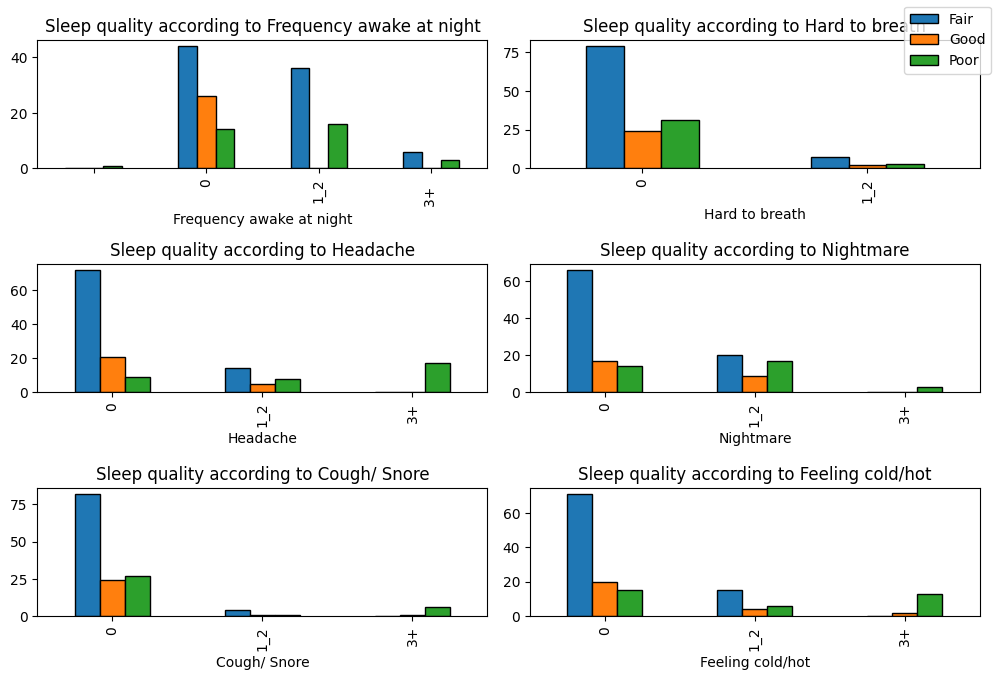

In [93]:
fig=plt.figure(figsize=(10,13))
columns= ['Frequency awake at night', 'Hard to breath','Headache','Nightmare','Cough/ Snore','Feeling cold/hot']
count=1
for column in columns:
  ax1= fig.add_subplot(6,2,count)
  pd.crosstab(df[column],df['Sleep quality']).plot(kind='bar',edgecolor='black',ax=ax1,legend=False)
  ax1.set_title(f'Sleep quality according to {column}')
  count+=1
#Get the handles and labels from the first subplot
handles, labels= ax1.get_legend_handles_labels()

fig.legend(handles,labels,loc='upper right')
plt.tight_layout();

It is visible that the **poor sleep quality** mostly results from "*Headache*" and "*Frequency awake at night*" with the frequency of **more than 3 times** per week.

In [94]:
df4=df[['Sleep efficiency','Headache','Time go to sleep', 'Sleep Duration']]

In [95]:
df4=df4.dropna()
df4.corr()['Sleep efficiency'].sort_values(ascending=False)

<ipython-input-95-d0081c410fca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df4.corr()['Sleep efficiency'].sort_values(ascending=False)


Sleep efficiency    1.000000
Sleep Duration      0.360869
Name: Sleep efficiency, dtype: float64

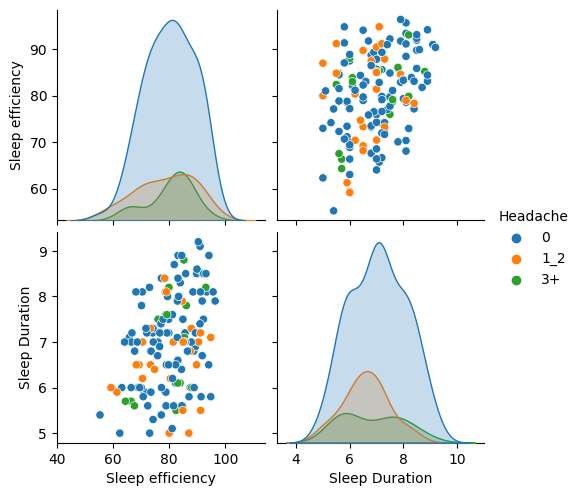

In [96]:
sns.pairplot(df4, hue='Headache')

In [97]:
df3=df[['Sleep efficiency','Frequency awake at night','Time go to sleep', 'Sleep Duration','Sleep latency','Awaking time before sleeping']]
df3=df3.dropna()
df3.corr()['Sleep efficiency'].sort_values(ascending=False)

<ipython-input-97-bde31f0fcccd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()['Sleep efficiency'].sort_values(ascending=False)


Sleep efficiency                1.000000
Sleep Duration                  0.360869
Sleep latency                  -0.193367
Awaking time before sleeping   -0.914670
Name: Sleep efficiency, dtype: float64

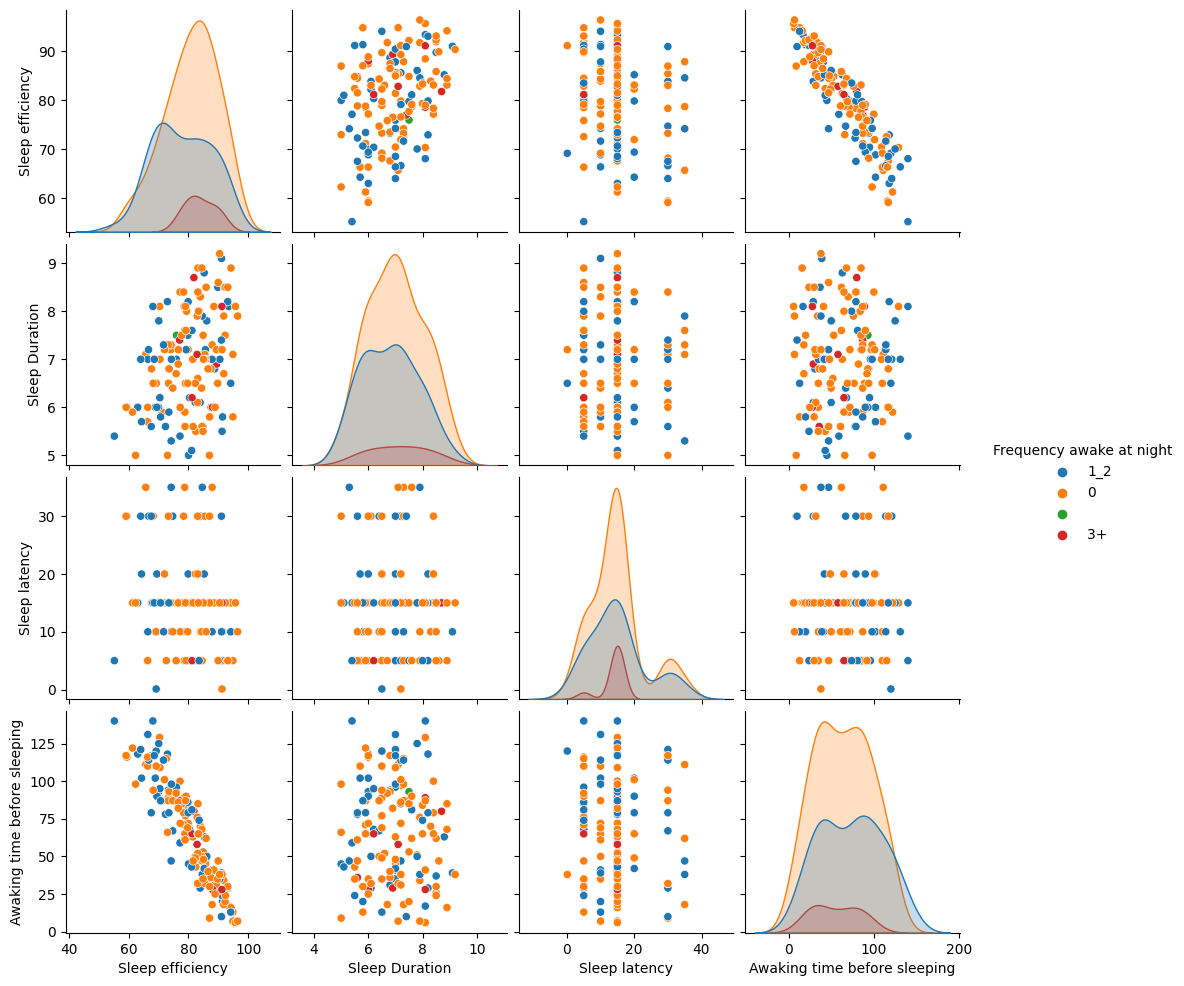

In [98]:
sns.pairplot(df3, hue='Frequency awake at night')

##  Correlation Matrix

The correlation matrix shows how different variables in the dataset are related. By visualizing it with a heatmap, I can identify strong correlations and use these insights to select relevant features for the classification model.

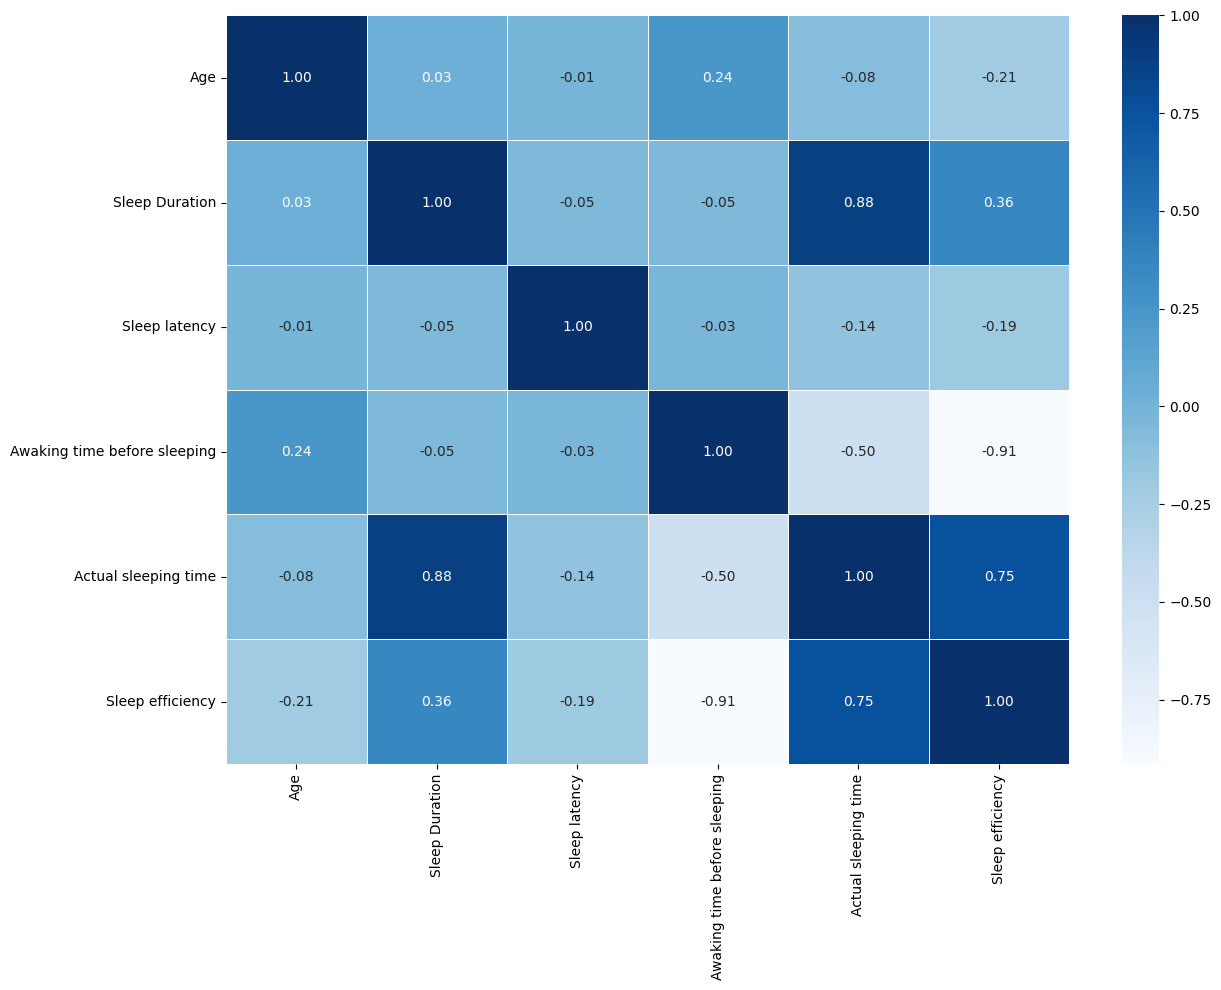

In [99]:
corr_matrix = df.corr(numeric_only=True)

fig,ax=plt.subplots(figsize=(13,10))

ax= sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap='Blues')
plt.tight_layout();

Each entry in the matrix represents the correlation between two variables, indicating the strength and direction of their linear relationship. The correlation coefficient ranges from -1 to 1:

* If the correlation coefficient is close to 1, it indicates a strong positive correlation, meaning that as one variable increases, the other variable tends to increase as well.

* If the correlation coefficient is close to -1, it indicates a strong negative correlation, meaning that as one variable increases, the other variable tends to decrease.

* If the correlation coefficient is close to 0, it indicates a weak or no linear correlation between the variables.

In [100]:
corr_matrix['Sleep efficiency'].sort_values(ascending = False)

Sleep efficiency                1.000000
Actual sleeping time            0.754637
Sleep Duration                  0.360869
Sleep latency                  -0.193367
Age                            -0.205821
Awaking time before sleeping   -0.914670
Name: Sleep efficiency, dtype: float64

**Conclusion:** It is clearly seen that the **"Actual sleeping time"** is  the most related to the **"Sleep efficiency"** at 0.75. Moreover, **"Sleep duration"** is also associated with **"Actual sleeping time"** at 0.88.

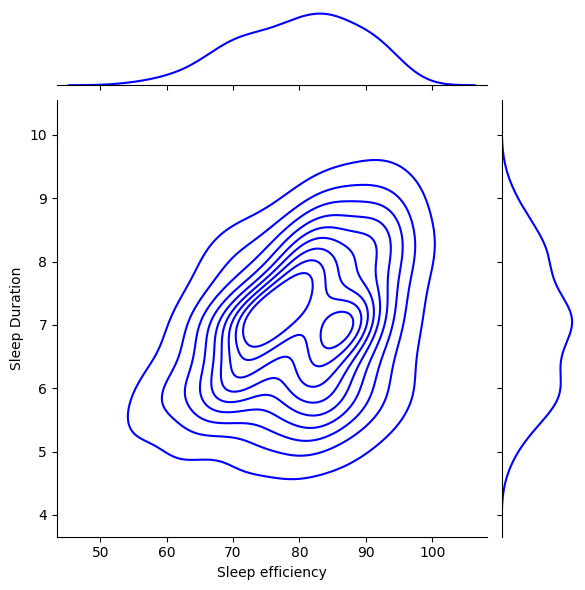

In [101]:
# Joint plot of features "Sleep quality" and "Time in bed" with unit second
sns.jointplot(x='Sleep efficiency',y='Sleep Duration',data=df,color='blue',kind = 'kde')

In [102]:
# The average of "Sleep Duration"

print ('The average time sleeping of these users is :', df['Sleep Duration'].mean(), 'hour')
print ('The average time sleeping of these users is :', df['Sleep Duration'].mean()*3600, 'second')

The average time sleeping of these users is : 6.951369863013698 hour
The average time sleeping of these users is : 25024.931506849316 second


# **6. Modelling**

I'll follow these steps to "Model":

1. Choose algorithms.
2. Set hyperparameters.
3. Split data for training and testing.
4. Train the models.
5. Evaluate performance.
6. Fine-tune models if needed.
7. Select the best model.
8. Finalize the chosen model.
9. Test the model on new data.
10. Make predictions for practical use.

Train and test data

In [ ]:
#Split the data into X and y
X=df.drop('Sleep quality',axis=1)
y =df['Sleep quality']

In [ ]:
X.head()

,Age,Time go to sleep,Sleep Duration,Sleep latency,Awaking time before sleeping,Frequency awake at night,Hard to breath,Headache,Nightmare,Cough/ Snore,Feeling cold/hot,Actual sleeping time,Sleep efficiency,Item
0,20,After 0h,8.1,15.0,17,1_2,0,0,0,0,1_2,454.0,93.415638,good94
1,25,After 0h,6.0,10.0,35,0,0,0,0,3+,0,315.0,87.500000,good89cough
2,21,23h_0h,6.1,15.0,50,1_2,0,0,1_2,1_2,1_2,301.0,82.240437,fair84
3,41,22h_23h,7.2,15.0,47,1_2,0,0,0,0,1_2,370.0,85.648148,good89
4,21,23h_0h,5.8,5.0,13,0,0,0,1_2,0,0,330.0,94.827586,good94


In [ ]:
y.head()

0    Fair
1    Good
2    Fair
3    Fair
4    Good
Name: Sleep quality, dtype: object

## Turn the categories into numbers

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ['Time go to sleep','Frequency awake at night','Hard to breath','Headache','Nightmare','Cough/ Snore','Feeling cold/hot', 'Item']
one_hot=OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)


In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)


In [ ]:
X_train.shape,X_test.shape

((116, 41), (30, 41))

In [ ]:
y_train.shape, y_test.shape

((116,), (30,))

I will use 3 different models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Claasifier

In [ ]:
models = {"LogisticRegression": LogisticRegression(max_iter=10000),
          "KNeighborsClassifier": KNeighborsClassifier(),
          "RandomForestClassifier" : RandomForestClassifier()}

def fit_score_metrics(models, X_train, X_test, y_train, y_test):
    """
    This function trains and tests different models and returns their accuracy scores.

    Parameters:
        models (dict): A dictionary containing model names as keys and corresponding initialized model objects as values.
        X_train (array-like): Training data features.
        X_test (array-like): Testing data features.
        y_train (array-like): Training data labels.
        y_test (array-like): Testing data labels.

    Returns:
        scores (dict): A dictionary containing model names as keys and their accuracy scores on the test data as values.
    """
    # Set a random seed
    np.random.seed(42)

    # Dict of models scores
    metrics = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)

        metrics[model_name] = { "Accuracy": f"{accuracy_score(y_test, y_preds) * 100:.2f}%",
                                "Precision": precision_score(y_test, y_preds, average='macro'),
                                "Recall": recall_score(y_test, y_preds, average='macro'),
                                "F1": f1_score(y_test, y_preds, average='macro')}

    return  metrics
model_metrics = fit_score_metrics(models, X_train, X_test, y_train, y_test)
df_model_scores = pd.DataFrame.from_dict(model_metrics).T
df_model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Precision,Recall,F1
LogisticRegression,86.67%,0.814815,0.814815,0.814815
KNeighborsClassifier,50.00%,0.25,0.37037,0.296296
RandomForestClassifier,90.00%,0.847059,0.925926,0.868487


* **Accuracy**: It shows how often the model is correct in its predictions. Higher accuracy means the model is making more correct predictions overall.

* **Precision**: It tells us how many of the positive predictions made by the model are actually correct. High precision means fewer false positive predictions.

* **Recall**: It tells us how many of the actual positive instances the model can correctly identify. High recall means the model is good at finding positive instances.

* **F1 Score**: It's a balanced metric that considers both precision and recall. It's useful when you want to have a single measure that takes into account both correct positive predictions and the ability to find positive instances.

### Model comparision

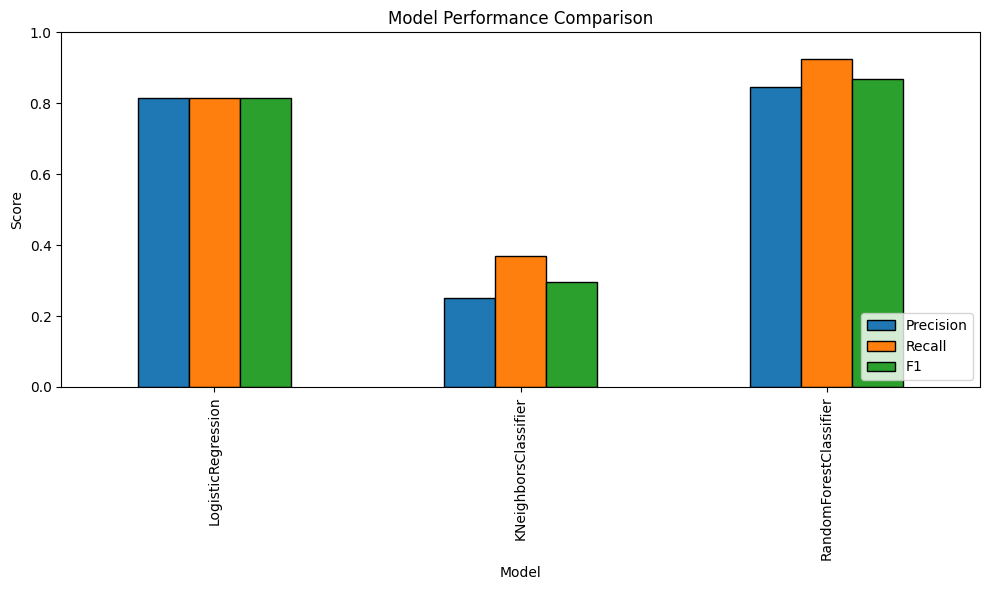

In [ ]:
# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

df_model_scores.plot(kind='bar', ax=ax, edgecolor='black')

# Customize the plot
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_ylim(0, 1)  # Set the y-axis limit to show scores between 0 and 1
ax.legend(loc='lower right')

# Show the plot
plt.tight_layout();

### Hyperparameter tuning with GridSearchCV
I need to find the best hyperparameter settings for Logistic Regression, K-Nearest Neighbors(KNN) and Random Forest models. After evaluating the models, I will select the best-performing one, optimizing it for better predictions on new data.

In [ ]:
def tune_model(model, param):
    np.random.seed(42)
    """
    Tune hyperparameters of the given model using GridSearchCV.

    Parameters:
        model (estimator): The model to be tuned.
        param (dict): The dictionary containing hyperparameter grids to search.

    Returns:
        GridSearchCV: The fitted GridSearchCV object with the best hyperparameters.
    """
    # Setup random hyperparameter search
    gs = GridSearchCV(model,
                      param_grid=param,
                      cv=5,
                      verbose=True)

    # Fit random hyperparameter search model
    return gs.fit(X_train, y_train)
# Create a hyperparameter grid for logisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Tune logisticRegression
log_red_tuned = tune_model(LogisticRegression(), log_reg_grid)
log_red_tuned.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 4.281332398719396, 'solver': 'liblinear'}

In [ ]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid ={
    'bootstrap': [True],
    'max_depth': [80,  110],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [ 200, 300, 1000]
}
# Tune RandomForestClassifier
rf_grid_tuned = tune_model(RandomForestClassifier(), rf_grid)
rf_grid_tuned.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'bootstrap': True,
 'max_depth': 110,
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
#Create a hyperparameter grid for  KNeighborsClassifier
knn_grid = {'n_neighbors': [3, 5, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]}

# Tune KNeighborsClassifier
knn_grid_tuned = tune_model(KNeighborsClassifier(), knn_grid)
knn_grid_tuned.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [ ]:
models_tuning = {"LogisticRegression": LogisticRegression(C= 1.623776739188721, solver= 'liblinear'),
                  "KNeighborsClassifier": KNeighborsClassifier(),
                  "RandomForestClassifier" : RandomForestClassifier(bootstrap=True,max_depth= 80,
                                                                    min_samples_split= 8,
                                                                    n_estimators= 300)}

model_tuning_metrics = fit_score_metrics(models_tuning, X_train, X_test, y_train, y_test)
df_model_tuning_scores = pd.DataFrame.from_dict(model_tuning_metrics).T


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Before Tunning:**

In [ ]:
df_model_scores

,Accuracy,Precision,Recall,F1
LogisticRegression,86.67%,0.814815,0.814815,0.814815
KNeighborsClassifier,50.00%,0.25,0.37037,0.296296
RandomForestClassifier,90.00%,0.847059,0.925926,0.868487


**After Tunning:**

In [ ]:
df_model_tuning_scores

,Accuracy,Precision,Recall,F1
LogisticRegression,80.00%,0.721296,0.777778,0.737473
KNeighborsClassifier,50.00%,0.25,0.37037,0.296296
RandomForestClassifier,90.00%,0.847059,0.925926,0.868487


RandomizedSearchCV

In [ ]:
# Tune logisticRegression

np.random.seed(42)

# Create a hyperparameter grid for logisticRegression
log_reg_grid = {
        'C': np.logspace(-4, 4, 20),  # Regularization parameter values
        'solver': ['liblinear', 'saga'],  # Solvers for optimization
        'max_iter': [100, 1000, 10000]  # Maximum number of iterations
    }

# Setup random hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
rs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

0.8333333333333334

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 10000, 'C': 78.47599703514607}

In [ ]:
def cross_validation(clf, X, y, cv):
    """
    Perform cross-validation and calculate evaluation metrics.

    Parameters:
        clf (estimator): The classifier or model to be evaluated.
        X (array-like): The feature matrix.
        y (array-like): The target vector.
        cv (int or cross-validation generator): Determines the cross-validation splitting strategy.
        scoring_metrics (list): A list of scoring metrics to be used for evaluation.

    Returns:
        list: Mean values of the specified evaluation metrics from cross-validation.
    """

    # Calculate evaluation metrics using cross-validation
    accuracy = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    precision = cross_val_score(clf, X, y, cv=cv, scoring='precision_macro')
    recall = cross_val_score(clf, X, y, cv=cv, scoring='recall_macro')
    f1 = cross_val_score(clf, X, y, cv=cv, scoring='f1_macro')


    mean_accuracy = np.mean(accuracy)
    mean_precision = np.mean(precision)
    mean_recall = np.mean(recall)
    mean_f1 = np.mean(f1)

    return [mean_accuracy, mean_precision, mean_recall, mean_f1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

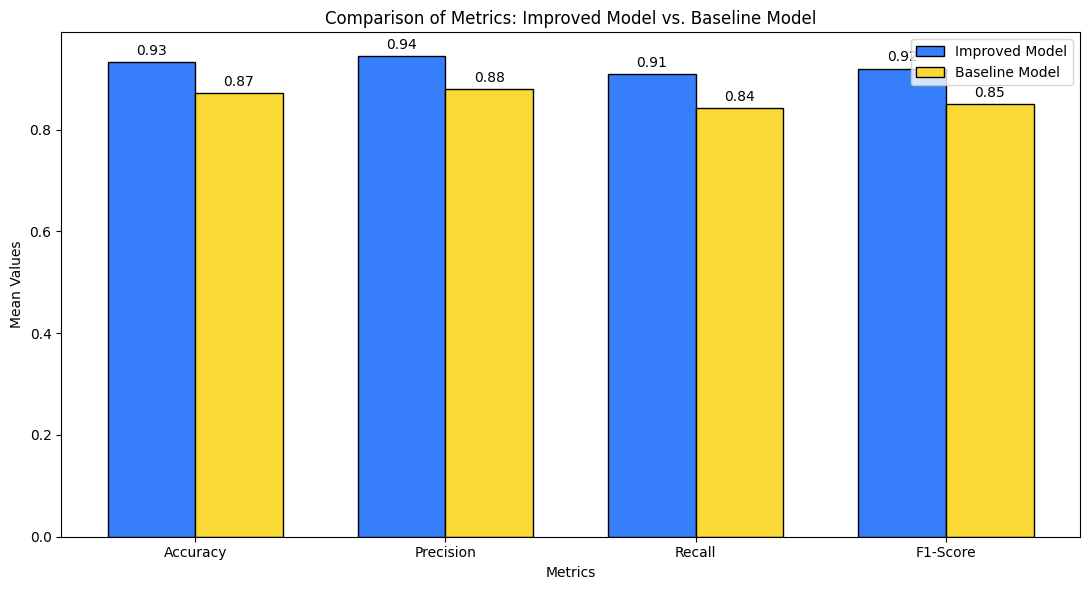

In [ ]:
# Create a list of metric names for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Create lists of mean values for both models
improved_model_means =cross_validation(LogisticRegression(C= 1.623776739188721,  solver= 'liblinear'),
                                       cv=5, X=transformed_X, y=y)

baseline_model_means = cross_validation(LogisticRegression(), cv=5, X=transformed_X, y=y)

# Set the width of the bars
bar_width = 0.35

# Create a bar plot for comparison
fig, ax = plt.subplots(figsize=(11, 6))
index = np.arange(len(metrics))

rects1 = ax.bar(index - bar_width/2, improved_model_means, bar_width, label='Improved Model',edgecolor='black',color='#377efa')
rects2 = ax.bar(index + bar_width/2, baseline_model_means, bar_width, label='Baseline Model',edgecolor='black',color='#fad937')

ax.set_xlabel('Metrics')
ax.set_ylabel('Mean Values')
ax.set_title('Comparison of Metrics: Improved Model vs. Baseline Model')
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend()

# Display the values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [ ]:
clf = LogisticRegression(C= 1.623776739188721, max_iter= 10000, solver= 'liblinear')
clf.fit(X_train, y_train)


LogisticRegression(C=1.623776739188721, max_iter=10000, solver='liblinear')

In [ ]:
# Get the column names (feature names)
feature_names = df.columns.drop('Sleep quality')

# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

# Create a DataFrame to hold the coefficients and feature names
coef_df = pd.DataFrame(feature_dict, columns=feature_names, index=["Health Variable"])

# Transpose the DataFrame to have features as rows
coef_df = coef_df.T
coef_df

,Health Variable
Age,0.318383
Time go to sleep,0.084326
Sleep Duration,-0.167784
Sleep latency,-0.241484
Awaking time before sleeping,-0.103732
Frequency awake at night,-0.829701
Hard to breath,0.664438
Headache,0.262437
Nightmare,-0.425045
Cough/ Snore,0.418486


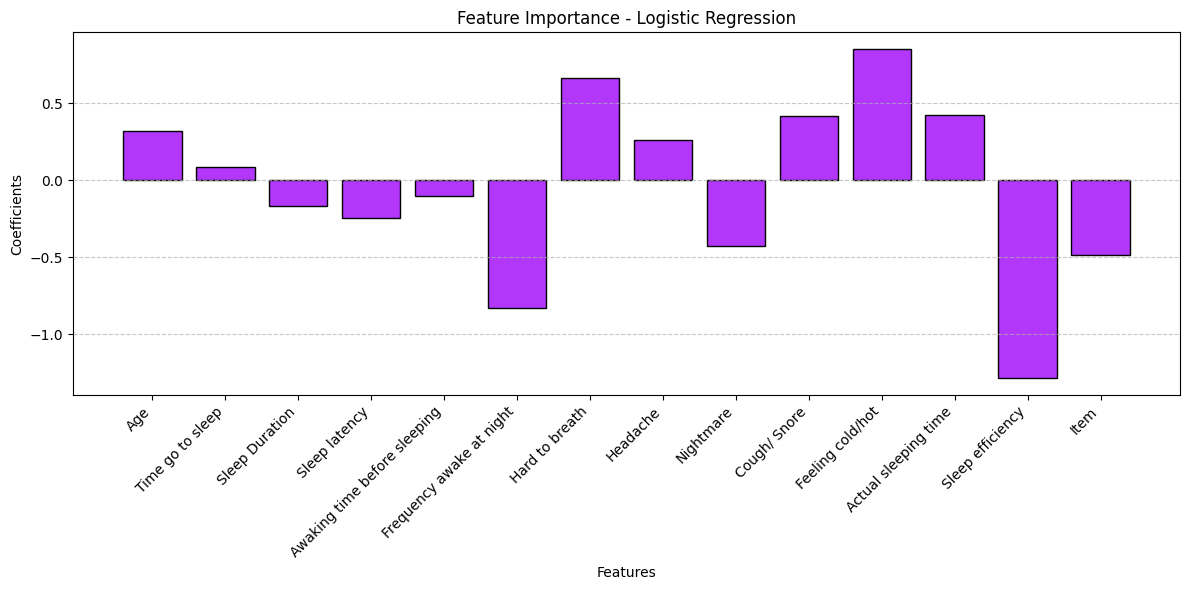

In [ ]:
# Rename the columns to the class names (e.g., Class 0, Class 1, Class 2)
class_names = [f"Class {i}" for i in range(len(coef_df.columns))]
coef_df.columns = class_names

# Plot the bar chart with custom styles
plt.figure(figsize=(12, 6))


# Plot the bars for each class with different colors
for idx, class_name in enumerate(class_names):
    plt.bar(coef_df.index, coef_df[class_name], label=class_name, edgecolor='black', color='#b237fa')

# Add labels, title, and legend
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Feature Importance - Logistic Regression")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout();

In [ ]:
import pickle


# Save a model to a file
pickle.dump(clf, open("Sleepwise AI.pkl", "wb"))
# load a saved model
clf = pickle.load(open("Sleepwise AI.pkl", "rb"))
model = {"Sleepwise AI" : clf}
model_metrics = fit_score_metrics(model, X_train, X_test, y_train, y_test)
df_model_scores = pd.DataFrame.from_dict(model_metrics).T
df_model_scores

,Accuracy,F1,Precision,Recall
Sleepwise AI,80.00%,0.737473,0.721296,0.777778


In [ ]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
y_true = np.array(y_test)  # Replace y_test with your true labels
y_pred = clf.predict(X_test)  # Replace clf with your model name and X_test with your test data

# Create a DataFrame to display true labels and predicted labels side by side
df= pd.DataFrame({'True Labels': y_true, 'Predicted Labels': y_pred})

# Print the DataFrame
df

,True Labels,Predicted Labels
0,Poor,Fair
1,Fair,Fair
2,Good,Good
3,Fair,Fair
4,Poor,Poor
5,Fair,Fair
6,Fair,Good
7,Fair,Fair
8,Poor,Poor
9,Fair,Fair


In [ ]:
# Export the DataFrame to a CSV file
df.to_csv('true_vs_predicted_labels.csv', index=False)

### **7. Giving advise**
I will create a function that will suggest suitable advise for the user based on his/her sleeping figures.

In [103]:
def convert(row):
    if row['Sleep efficiency'] >= 95.01 and row['Frequency awake at night'] == '3+':
       return 'good95awake'
    elif row['Sleep efficiency'] <= 94.99 and row['Sleep efficiency'] >= 90.01 and row['Frequency awake at night'] == '3+':
        return 'good94awake'
    elif row['Sleep efficiency'] <= 89.99 and row['Sleep efficiency'] >= 85.01 and row['Frequency awake at night'] == '3+':
        return 'good89awake'
    elif row['Sleep quality'] == 'Poor' and row['Frequency awake at night']== '3+':
        return 'poorawake'
    elif row['Sleep efficiency'] <= 70 and row['Frequency awake at night'] == '3+':
        return 'fair70awake'

    if row['Sleep efficiency'] >= 95.01 and row['Headache'] == '3+':
       return 'good95headache'
    elif row['Sleep efficiency'] <= 94.99 and row['Sleep efficiency'] >= 90.01 and row['Headache'] == '3+':
        return 'good94headache'
    elif row['Sleep efficiency'] <= 89.99 and row['Sleep efficiency'] >= 85.01 and row['Headache'] == '3+':
        return 'good89headache'
    elif row['Sleep quality'] == 'Poor' and row['Headache']== '3+':
        return 'poorheadache'
    elif row['Sleep efficiency'] <= 70 and row['Headache'] == '3+':
        return 'fair70headache'


    if row['Sleep efficiency'] >= 95.01 and row['Feeling cold/hot'] == '3+':
       return 'good95hot'
    elif row['Sleep efficiency'] <= 94.99 and row['Sleep efficiency'] >= 90.01 and row['Feeling cold/hot'] == '3+':
        return 'good94hot'
    elif row['Sleep efficiency'] <= 89.99 and row['Sleep efficiency'] >= 85.01 and row['Feeling cold/hot'] == '3+':
        return 'good89hot'
    elif row['Sleep quality'] == 'Poor' and row['Feeling cold/hot']== '3+':
        return 'poorheadahce'
    elif row['Sleep efficiency'] <= 70 and row['Feeling cold/hot'] == '3+':
        return 'fair70hot'

    if row['Sleep efficiency'] >= 95.01 and row['Cough/ Snore'] == '3+':
       return 'good95cough'
    elif row['Sleep efficiency'] <= 94.99 and row['Sleep efficiency'] >= 90.01 and row['Cough/ Snore'] == '3+':
        return 'good94cough'
    elif row['Sleep efficiency'] <= 89.99 and row['Sleep efficiency'] >= 85.01 and row['Cough/ Snore'] == '3+':
        return 'good89cough'
    elif row['Sleep quality'] == 'Poor' and row['Cough/ Snore']== '3+':
        return 'poorheadahce'
    elif row['Sleep efficiency'] <= 70 and row['Cough/ Snore'] == '3+':
        return 'fair70cough'

    if row['Sleep efficiency'] >= 95.01 and row['Hard to breath'] == '3+':
       return 'good95breath'
    elif row['Sleep efficiency'] <= 94.99 and row['Sleep efficiency'] >= 90.01 and row['Hard to breath'] == '3+':
        return 'good94breath'
    elif row['Sleep efficiency'] <= 89.99 and row['Sleep efficiency'] >= 85.01 and row['Hard to breath'] == '3+':
        return 'good89breath'
    elif row['Sleep quality'] == 'Poor' and row['Hard to breath']== '3+':
        return 'poorheadahce'
    elif row['Sleep efficiency'] <= 70 and row['Hard to breath'] == '3+':
        return 'fair70breath'
    else:
      if row['Sleep efficiency'] >= 95.01:
        return 'good95'
      elif row['Sleep efficiency'] <= 94.99 and row['Sleep efficiency'] >= 90.01:
        return 'good94'
      elif row['Sleep efficiency'] <= 89.99 and row['Sleep efficiency'] >= 85.01:
        return 'good89'
      elif row['Sleep efficiency'] <= 84.99 and row['Sleep efficiency'] >= 80.01:
        return 'fair84'
      elif row['Sleep quality'] == 'Poor':
        return 'poor'
      else:
        return 'fair70'


df['Item']= df.apply(convert,axis=1)
df

,Age,Time go to sleep,Sleep Duration,Sleep latency,Awaking time before sleeping,Frequency awake at night,Hard to breath,Headache,Nightmare,Cough/ Snore,Feeling cold/hot,Actual sleeping time,Sleep efficiency,Sleep quality,Item
0,20,After 0h,8.1,15.0,17,1_2,0,0,0,0,1_2,454.0,93.415638,Fair,good94
1,25,After 0h,6.0,10.0,35,0,0,0,0,3+,0,315.0,87.500000,Good,good89cough
2,21,23h_0h,6.1,15.0,50,1_2,0,0,1_2,1_2,1_2,301.0,82.240437,Fair,fair84
3,41,22h_23h,7.2,15.0,47,1_2,0,0,0,0,1_2,370.0,85.648148,Fair,good89
4,21,23h_0h,5.8,5.0,13,0,0,0,1_2,0,0,330.0,94.827586,Good,good94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,48,23h_0h,5.8,15.0,87,1_2,0,0,0,0,0,246.0,70.689655,Fair,fair70
146,17,23h_0h,5.6,30.0,79,1_2,0,3+,0,1_2,0,227.0,67.559524,Poor,poorheadache
147,34,22h_23h,5.0,15.0,98,0,1_2,0,0,0,1_2,187.0,62.333333,Fair,fair70
148,12,22h_23h,5.6,15.0,47,0,0,0,0,0,0,274.0,81.547619,Fair,fair84


In [104]:
def get_advise(row):

 if row  =='good95':
   return'Thật bất ngờ. Chỉ số hiệu quả giấc ngủ của bạn rất cao (>95%). Nhưng bạn có cảm thấy mệt mỏi dù chất lượng giấc ngủ tốt không? Nếu không thì bạn nên tiếp tục duy trì giờ đi ngủ như vậy nhé. Nếu có thì điều này đôi khi bởi vì bạn không ngủ đủ giấc. Lời khuyên: Bạn nên đi ngủ sớm hơn 30 phút tuần này.'
 elif row  =='good94':
   return'Tuyệt vời, hiệu quả giấc ngủ của bạn rất tốt. Bạn nên tiếp tục kiên trì đi ngủ đúng giờ nhé. Và cũng nên kết hợp với việc tập thể thao mỗi ngày nữa. Để lại có giấc ngủ hiệu quả (trong khoảng 85-89% là tốt nhất)'
 elif row  =='good89':
   return 'Tuyệt vời, hiệu quả giấc ngủ của bạn cực kì tốt. Bạn không cần thay đổi giờ đi ngủ mà hãy tiếp tục duy trì nó tuần này nhé (trong khoảng 85-89% là tốt nhất).'
 elif row  =='fair84':
   return "Hiệu quả giấc ngủ của bạn đang ở mức khá. Tốt nhất, bạn nên dành một tỷ lệ lớn hơn thời gian trên giường để ngủ. Và tuần này là cơ hội cho bạn có thể cải thiện nó bằng cách đạt giờ đi ngủ trễ hơn 15 phút. (Chỉ số nằm trong khoảng 85-89% là tốt nhất)"
 elif row  =='fair70':
   return 'Hiệu quả giấc ngủ của bạn đang ở mức khá. Tốt nhất, bạn nên dành một tỷ lệ lớn hơn thời gian trên giường để ngủ. Và tuần này là cơ hội cho bạn có thể cải thiện nó bằng cách đạt giờ đi ngủ trễ hơn 15 phút. (Chỉ số nằm trong khoảng 85-89% là tốt nhất)'
 elif row  =='poor':
   return 'Chất lượng giấc ngủ của bạn kém. Bạn nên dành thời gian ngủ trưa  tầm 10-20 phút và duy trì chế độ ăn uống hợp lý kết hợp tập thể dục thường xuyên. Nếu bạn cảm thấy quá mệt mỏi thì hãy dành thời gian để thư giãn trước khi đi ngủ mỗi đêm. Các thói quen như đọc sách, nghe nhạc nhẹ nhàng hoặc ngâm mình trong bồn nước ấm thì luôn được khuyến khích. Có vẻ bạn hay trần trọc không ngủ được. Nguyên nhân có thể là do bạn “nạp” vào cơ thể quá nhiều cà phê, thuốc lá, và stress cũng là một lý do không thể bỏ qua. Vì vậy bạn hãy hạn chế các chất kích thích, chuẩn bị không gian ngủ sạch sẽ tinh tươm và “xả stress” hoàn toàn trước giờ ngủ.'
 else:
  if row  =='good95awake':
     return'Thật bất ngờ. Chỉ số hiệu quả giấc ngủ của bạn rất cao (>95%). Nhưng bạn có cảm thấy mệt mỏi dù chất lượng giấc ngủ tốt không? Nếu không thì bạn nên tiếp tục duy trì giờ đi ngủ như vậy nhé. Nếu có thì điều này đôi khi bởi vì bạn không ngủ đủ giấc. Lời khuyên: Bạn nên đi ngủ sớm hơn 30 phút tuần này. Có vẻ như bạn hay tỉnh giấc giữ đêm. Bạn nên hạn chế uống nhiều nước cũng như ăn đồ ăn nhiều dầu mỡ và ít chất xơ, cay nồng trước khi đi ngủ vì việc này sẽ khiến cơ thể bị phấn khích và hệ tiêu hóa vẫn phải hoạt động tích cực để tiêu thụ thức ăn trong lúc ngủ.'
  elif row  =='good94awake':
     return'Tuyệt vời, hiệu quả giấc ngủ của bạn rất tốt. Bạn nên tiếp tục kiên trì đi ngủ đúng giờ nhé. Và cũng nên kết hợp với việc tập thể thao mỗi ngày nữa. Để lại có giấc ngủ hiệu quả (trong khoảng 85-89% là tốt nhất) Có vẻ như bạn hay tỉnh giấc giữ đêm. Bạn nên hạn chế uống nhiều nước cũng như ăn đồ ăn nhiều dầu mỡ và ít chất xơ, cay nồng trước khi đi ngủ vì việc này sẽ khiến cơ thể bị phấn khích và hệ tiêu hóa vẫn phải hoạt động tích cực để tiêu thụ thức ăn trong lúc ngủ.'
  elif row  =='good89awake':
     return'Tuyệt vời, hiệu quả giấc ngủ của bạn cực kì tốt. Bạn không cần thay đổi giờ đi ngủ mà hãy tiếp tục duy trì nó tuần này nhé (trong khoảng 85-89% là tốt nhất). Có vẻ như bạn hay tỉnh giấc giữ đêm. Bạn nên hạn chế uống nhiều nước cũng như ăn đồ ăn nhiều dầu mỡ và ít chất xơ, cay nồng trước khi đi ngủ vì việc này sẽ khiến cơ thể bị phấn khích và hệ tiêu hóa vẫn phải hoạt động tích cực để tiêu thụ thức ăn trong lúc ngủ.'
  elif row  =='fair84awake':
     return'Hiệu quả giấc ngủ của bạn đang ở mức khá. Tốt nhất, bạn nên dành một tỷ lệ lớn hơn thời gian trên giường để ngủ. Và tuần này là cơ hội cho bạn có thể cải thiện nó bằng cách đạt giờ đi ngủ trễ hơn 15 phút. (Chỉ số nằm trong khoảng 85-89% là tốt nhất) Có vẻ như bạn hay tỉnh giấc giữ đêm. Bạn nên hạn chế uống nhiều nước cũng như ăn đồ ăn nhiều dầu mỡ và ít chất xơ, cay nồng trước khi đi ngủ vì việc này sẽ khiến cơ thể bị phấn khích và hệ tiêu hóa vẫn phải hoạt động tích cực để tiêu thụ thức ăn trong lúc ngủ.'
  elif row  =='fair70awake':
     return'Hiệu quả giấc ngủ của bạn đang ở mức khá. Tốt nhất, bạn nên dành một tỷ lệ lớn hơn thời gian trên giường để ngủ. Và tuần này là cơ hội cho bạn có thể cải thiện nó bằng cách đạt giờ đi ngủ trễ hơn 15 phút. (Chỉ số nằm trong khoảng 85-89% là tốt nhất) Có vẻ như bạn hay tỉnh giấc giữ đêm. Bạn nên hạn chế uống nhiều nước cũng như ăn đồ ăn nhiều dầu mỡ và ít chất xơ, cay nồng trước khi đi ngủ vì việc này sẽ khiến cơ thể bị phấn khích và hệ tiêu hóa vẫn phải hoạt động tích cực để tiêu thụ thức ăn trong lúc ngủ.'
  elif row =='poorawake':
     return"Chất lượng giấc ngủ của bạn kém. Bạn nên dành thời gian ngủ trưa  tầm 10-20 phút và duy trì chế độ ăn uống hợp lý kết hợp tập thể dục thường xuyên. Nếu bạn cảm thấy quá mệt mỏi thì hãy dành thời gian để thư giãn trước khi đi ngủ mỗi đêm. Các thói quen như đọc sách, nghe nhạc nhẹ nhàng hoặc ngâm mình trong bồn nước ấm thì luôn được khuyến khích. Có vẻ bạn hay trần trọc không ngủ được. Nguyên nhân có thể là do bạn “nạp” vào cơ thể quá nhiều cà phê, thuốc lá, và stress cũng là một lý do không thể bỏ qua. Vì vậy bạn hãy hạn chế các chất kích thích, chuẩn bị không gian ngủ sạch sẽ tinh tươm và “xả stress” hoàn toàn trước giờ ngủ. Có vẻ như bạn hay tỉnh giấc giữ đêm. Bạn nên hạn chế uống nhiều nước cũng như ăn đồ ăn nhiều dầu mỡ và ít chất xơ, cay nồng trước khi đi ngủ vì việc này sẽ khiến cơ thể bị phấn khích và hệ tiêu hóa vẫn phải hoạt động tích cực để tiêu thụ thức ăn trong lúc ngủ."

  elif row  =='good95hot':
     return'Thật bất ngờ. Chỉ số hiệu quả giấc ngủ của bạn rất cao (>95%). Nhưng bạn có cảm thấy mệt mỏi dù chất lượng giấc ngủ tốt không? Nếu không thì bạn nên tiếp tục duy trì giờ đi ngủ như vậy nhé. Nếu có thì điều này đôi khi bởi vì bạn không ngủ đủ giấc. Lời khuyên: Bạn nên đi ngủ sớm hơn 30 phút tuần này. Có vẻ như bạn hay cảm thấy quá nóng/ quá lạnh khi ngủ. Bạn nên điều chỉnh nhiệt độ phòng thích hợp cũng như giữ cho giường ngủ sạch sẽ, thoải mái để có được một giấc ngủ ngon nhé.'
  elif row  =='good94hot':
     return'Tuyệt vời, hiệu quả giấc ngủ của bạn rất tốt. Bạn nên tiếp tục kiên trì đi ngủ đúng giờ nhé. Và cũng nên kết hợp với việc tập thể thao mỗi ngày nữa. Để lại có giấc ngủ hiệu quả (trong khoảng 85-89% là tốt nhất) Có vẻ như bạn hay cảm thấy quá nóng/ quá lạnh khi ngủ. Bạn nên điều chỉnh nhiệt độ phòng thích hợp cũng như giữ cho giường ngủ sạch sẽ, thoải mái để có được một giấc ngủ ngon nhé.'
  elif row  =='good89hot':
     return'Tuyệt vời, hiệu quả giấc ngủ của bạn cực kì tốt. Bạn không cần thay đổi giờ đi ngủ mà hãy tiếp tục duy trì nó tuần này nhé (trong khoảng 85-89% là tốt nhất). Có vẻ như bạn hay cảm thấy quá nóng/ quá lạnh khi ngủ. Bạn nên điều chỉnh nhiệt độ phòng thích hợp cũng như giữ cho giường ngủ sạch sẽ, thoải mái để có được một giấc ngủ ngon nhé.'
  elif row  =='fair84hot':
     return'Hiệu quả giấc ngủ của bạn đang ở mức khá. Tốt nhất, bạn nên dành một tỷ lệ lớn hơn thời gian trên giường để ngủ. Và tuần này là cơ hội cho bạn có thể cải thiện nó bằng cách đạt giờ đi ngủ trễ hơn 15 phút. (Chỉ số nằm trong khoảng 85-89% là tốt nhất) Có vẻ như bạn hay cảm thấy quá nóng/ quá lạnh khi ngủ. Bạn nên điều chỉnh nhiệt độ phòng thích hợp cũng như giữ cho giường ngủ sạch sẽ, thoải mái để có được một giấc ngủ ngon nhé.'
  elif row  =='fair70hot':
     return'Hiệu quả giấc ngủ của bạn đang ở mức khá. Tốt nhất, bạn nên dành một tỷ lệ lớn hơn thời gian trên giường để ngủ. Và tuần này là cơ hội cho bạn có thể cải thiện nó bằng cách đạt giờ đi ngủ trễ hơn 15 phút. (Chỉ số nằm trong khoảng 85-89% là tốt nhất) Có vẻ như bạn hay cảm thấy quá nóng/ quá lạnh khi ngủ. Bạn nên điều chỉnh nhiệt độ phòng thích hợp cũng như giữ cho giường ngủ sạch sẽ, thoải mái để có được một giấc ngủ ngon nhé.'
  elif row =='poorhot':
    return'Chất lượng giấc ngủ của bạn kém. Bạn nên dành thời gian ngủ trưa  tầm 10-20 phút và duy trì chế độ ăn uống hợp lý kết hợp tập thể dục thường xuyên. Nếu bạn cảm thấy quá mệt mỏi thì hãy dành thời gian để thư giãn trước khi đi ngủ mỗi đêm. Các thói quen như đọc sách, nghe nhạc nhẹ nhàng hoặc ngâm mình trong bồn nước ấm thì luôn được khuyến khích. Có vẻ bạn hay trần trọc không ngủ được. Nguyên nhân có thể là do bạn “nạp” vào cơ thể quá nhiều cà phê, thuốc lá, và stress cũng là một lý do không thể bỏ qua. Vì vậy bạn hãy hạn chế các chất kích thích, chuẩn bị không gian ngủ sạch sẽ tinh tươm và “xả stress” hoàn toàn trước giờ ngủ. Có vẻ như bạn hay cảm thấy quá nóng/ quá lạnh khi ngủ. Bạn nên điều chỉnh nhiệt độ phòng thích hợp cũng như giữ cho giường ngủ sạch sẽ, thoải mái để có được một giấc ngủ ngon nhé.'

  elif row  =='good95breath':
     return'Thật bất ngờ. Chỉ số hiệu quả giấc ngủ của bạn rất cao (>95%). Nhưng bạn có cảm thấy mệt mỏi dù chất lượng giấc ngủ tốt không? Nếu không thì bạn nên tiếp tục duy trì giờ đi ngủ như vậy nhé. Nếu có thì điều này đôi khi bởi vì bạn không ngủ đủ giấc. Lời khuyên: Bạn nên đi ngủ sớm hơn 30 phút tuần này. Có vẻ như bạn có khó khăn về hệ hô hấp khi ngủ, ví dụ như thở khò khè, nghẹt mũi. Bạn nên tìm nguyên nhân gây ra và trị nó tận gốc. Ngoài ra, bạn cũng có thể uống nước ấm và ăn nhiều trái cây và rau củ để bổ sung các chất cần thiết cho cơ thể.'
  elif row  =='good94breath':
     return'Tuyệt vời, hiệu quả giấc ngủ của bạn rất tốt. Bạn nên tiếp tục kiên trì đi ngủ đúng giờ nhé. Và cũng nên kết hợp với việc tập thể thao mỗi ngày nữa. Để lại có giấc ngủ hiệu quả (trong khoảng 85-89% là tốt nhất) Có vẻ như bạn có khó khăn về hệ hô hấp khi ngủ, ví dụ như thở khò khè, nghẹt mũi. Bạn nên tìm nguyên nhân gây ra và trị nó tận gốc. Ngoài ra, bạn cũng có thể uống nước ấm và ăn nhiều trái cây và rau củ để bổ sung các chất cần thiết cho cơ thể.'
  elif row  =='good89breath':
     return'Tuyệt vời, hiệu quả giấc ngủ của bạn cực kì tốt. Bạn không cần thay đổi giờ đi ngủ mà hãy tiếp tục duy trì nó tuần này nhé (trong khoảng 85-89% là tốt nhất). Có vẻ như bạn có khó khăn về hệ hô hấp khi ngủ, ví dụ như thở khò khè, nghẹt mũi. Bạn nên tìm nguyên nhân gây ra và trị nó tận gốc. Ngoài ra, bạn cũng có thể uống nước ấm và ăn nhiều trái cây và rau củ để bổ sung các chất cần thiết cho cơ thể.'
  elif row  =='fair84breath':
     return'Hiệu quả giấc ngủ của bạn đang ở mức khá. Tốt nhất, bạn nên dành một tỷ lệ lớn hơn thời gian trên giường để ngủ. Và tuần này là cơ hội cho bạn có thể cải thiện nó bằng cách đạt giờ đi ngủ trễ hơn 15 phút. (Chỉ số nằm trong khoảng 85-89% là tốt nhất) Có vẻ như bạn có khó khăn về hệ hô hấp khi ngủ, ví dụ như thở khò khè, nghẹt mũi. Bạn nên tìm nguyên nhân gây ra và trị nó tận gốc. Ngoài ra, bạn cũng có thể uống nước ấm và ăn nhiều trái cây và rau củ để bổ sung các chất cần thiết cho cơ thể.'
  elif row  =='fair70breath':
     return'Hiệu quả giấc ngủ của bạn đang ở mức khá. Tốt nhất, bạn nên dành một tỷ lệ lớn hơn thời gian trên giường để ngủ. Và tuần này là cơ hội cho bạn có thể cải thiện nó bằng cách đạt giờ đi ngủ trễ hơn 15 phút. (Chỉ số nằm trong khoảng 85-89% là tốt nhất) Có vẻ như bạn có khó khăn về hệ hô hấp khi ngủ, ví dụ như thở khò khè, nghẹt mũi. Bạn nên tìm nguyên nhân gây ra và trị nó tận gốc. Ngoài ra, bạn cũng có thể uống nước ấm và ăn nhiều trái cây và rau củ để bổ sung các chất cần thiết cho cơ thể.'
  elif row =='poorbreath':
    return'Chất lượng giấc ngủ của bạn kém. Bạn nên dành thời gian ngủ trưa  tầm 10-20 phút và duy trì chế độ ăn uống hợp lý kết hợp tập thể dục thường xuyên. Nếu bạn cảm thấy quá mệt mỏi thì hãy dành thời gian để thư giãn trước khi đi ngủ mỗi đêm. Các thói quen như đọc sách, nghe nhạc nhẹ nhàng hoặc ngâm mình trong bồn nước ấm thì luôn được khuyến khích. Có vẻ bạn hay trần trọc không ngủ được. Nguyên nhân có thể là do bạn “nạp” vào cơ thể quá nhiều cà phê, thuốc lá, và stress cũng là một lý do không thể bỏ qua. Vì vậy bạn hãy hạn chế các chất kích thích, chuẩn bị không gian ngủ sạch sẽ tinh tươm và “xả stress” hoàn toàn trước giờ ngủ. Có vẻ như bạn có khó khăn về hệ hô hấp khi ngủ, ví dụ như thở khò khè, nghẹt mũi. Bạn nên tìm nguyên nhân gây ra và trị nó tận gốc. Ngoài ra, bạn cũng có thể uống nước ấm và ăn nhiều trái cây và rau củ để bổ sung các chất cần thiết cho cơ thể.'

  elif row  =='good95cough':
     return'Thật bất ngờ. Chỉ số hiệu quả giấc ngủ của bạn rất cao (>95%). Nhưng bạn có cảm thấy mệt mỏi dù chất lượng giấc ngủ tốt không? Nếu không thì bạn nên tiếp tục duy trì giờ đi ngủ như vậy nhé. Nếu có thì điều này đôi khi bởi vì bạn không ngủ đủ giấc. Lời khuyên: Bạn nên đi ngủ sớm hơn 30 phút tuần này. Có vẻ như bạn hay ho hoặc ngáy khi ngủ. Bạn nên duy trì uống nước ấm, uống đủ 2 lít mỗi ngày. Hãy gối đầu cao hơn khi ngủ và nằm nghiêng trái sẽ giảm được tình trạng ho khi ngủ.'
  elif row  =='good94cough':
     return'Tuyệt vời, hiệu quả giấc ngủ của bạn rất tốt. Bạn nên tiếp tục kiên trì đi ngủ đúng giờ nhé. Và cũng nên kết hợp với việc tập thể thao mỗi ngày nữa. Để lại có giấc ngủ hiệu quả (trong khoảng 85-89% là tốt nhất) Có vẻ như bạn hay ho hoặc ngáy khi ngủ. Bạn nên duy trì uống nước ấm, uống đủ 2 lít mỗi ngày. Hãy gối đầu cao hơn khi ngủ và nằm nghiêng trái sẽ giảm được tình trạng ho khi ngủ.'
  elif row  =='good89cough':
     return'Tuyệt vời, hiệu quả giấc ngủ của bạn cực kì tốt. Bạn không cần thay đổi giờ đi ngủ mà hãy tiếp tục duy trì nó tuần này nhé (trong khoảng 85-89% là tốt nhất). Có vẻ như bạn hay ho hoặc ngáy khi ngủ. Bạn nên duy trì uống nước ấm, uống đủ 2 lít mỗi ngày. Hãy gối đầu cao hơn khi ngủ và nằm nghiêng trái sẽ giảm được tình trạng ho khi ngủ.'
  elif row  =='fair84cough':
     return'Hiệu quả giấc ngủ của bạn đang ở mức khá. Tốt nhất, bạn nên dành một tỷ lệ lớn hơn thời gian trên giường để ngủ. Và tuần này là cơ hội cho bạn có thể cải thiện nó bằng cách đạt giờ đi ngủ trễ hơn 15 phút. (Chỉ số nằm trong khoảng 85-89% là tốt nhất) Có vẻ như bạn hay ho hoặc ngáy khi ngủ. Bạn nên duy trì uống nước ấm, uống đủ 2 lít mỗi ngày. Hãy gối đầu cao hơn khi ngủ và nằm nghiêng trái sẽ giảm được tình trạng ho khi ngủ.'
  elif row  =='fair70cough':
     return'Hiệu quả giấc ngủ của bạn đang ở mức khá. Tốt nhất, bạn nên dành một tỷ lệ lớn hơn thời gian trên giường để ngủ. Và tuần này là cơ hội cho bạn có thể cải thiện nó bằng cách đạt giờ đi ngủ trễ hơn 15 phút. (Chỉ số nằm trong khoảng 85-89% là tốt nhất) Có vẻ như bạn hay ho hoặc ngáy khi ngủ. Bạn nên duy trì uống nước ấm, uống đủ 2 lít mỗi ngày. Hãy gối đầu cao hơn khi ngủ và nằm nghiêng trái sẽ giảm được tình trạng ho khi ngủ.'
  elif row =='poorcough':
    return'Chất lượng giấc ngủ của bạn kém. Bạn nên dành thời gian ngủ trưa  tầm 10-20 phút và duy trì chế độ ăn uống hợp lý kết hợp tập thể dục thường xuyên. Nếu bạn cảm thấy quá mệt mỏi thì hãy dành thời gian để thư giãn trước khi đi ngủ mỗi đêm. Các thói quen như đọc sách, nghe nhạc nhẹ nhàng hoặc ngâm mình trong bồn nước ấm thì luôn được khuyến khích. Có vẻ như bạn hay ho hoặc ngáy khi ngủ. Bạn nên duy trì uống nước ấm, uống đủ 2 lít mỗi ngày. Hãy gối đầu cao hơn khi ngủ và nằm nghiêng trái sẽ giảm được tình trạng ho khi ngủ.'

  elif row  =='good95headache':
     return'Thật bất ngờ. Chỉ số hiệu quả giấc ngủ của bạn rất cao (>95%). Nhưng bạn có cảm thấy mệt mỏi dù chất lượng giấc ngủ tốt không? Nếu không thì bạn nên tiếp tục duy trì giờ đi ngủ như vậy nhé. Nếu có thì điều này đôi khi bởi vì bạn không ngủ đủ giấc. Lời khuyên: Bạn nên đi ngủ sớm hơn 30 phút tuần này. Có vẻ như bạn hay cảm thấy đau đầu. Vậy thì nên tránh sử dụng rượu bia và các chất kích thích khác. Nếu như bạn thấy có quá nhiều thứ phải nghĩ tới khi nằm trên giường thì hãy viết ra giấy những điều ấy. Đừng để những áp lực của một ngày làm việc gây hại cho cơ thể, hãy bỏ qua mọi thứ trước lúc lên giường ngủ và tranh thủ một giấc ngủ trưa ngắn nếu được.'
  elif row  =='good94headache':
     return'Tuyệt vời, hiệu quả giấc ngủ của bạn rất tốt. Bạn nên tiếp tục kiên trì đi ngủ đúng giờ nhé. Và cũng nên kết hợp với việc tập thể thao mỗi ngày nữa. Để lại có giấc ngủ hiệu quả (trong khoảng 85-89% là tốt nhất) Có vẻ như bạn hay cảm thấy đau đầu. Vậy thì nên tránh sử dụng rượu bia và các chất kích thích khác. Nếu như bạn thấy có quá nhiều thứ phải nghĩ tới khi nằm trên giường thì hãy viết ra giấy những điều ấy. Đừng để những áp lực của một ngày làm việc gây hại cho cơ thể, hãy bỏ qua mọi thứ trước lúc lên giường ngủ và tranh thủ một giấc ngủ trưa ngắn nếu được. Có vẻ như bạn hay cảm thấy đau đầu. Vậy thì nên tránh sử dụng rượu bia và các chất kích thích khác. Nếu như bạn thấy có quá nhiều thứ phải nghĩ tới khi nằm trên giường thì hãy viết ra giấy những điều ấy. Đừng để những áp lực của một ngày làm việc gây hại cho cơ thể, hãy bỏ qua mọi thứ trước lúc lên giường ngủ và tranh thủ một giấc ngủ trưa ngắn nếu được.'
  elif row  =='good89headache':
     return'Tuyệt vời, hiệu quả giấc ngủ của bạn cực kì tốt. Bạn không cần thay đổi giờ đi ngủ mà hãy tiếp tục duy trì nó tuần này nhé (trong khoảng 85-89% là tốt nhất). Có vẻ như bạn hay cảm thấy đau đầu. Vậy thì nên tránh sử dụng rượu bia và các chất kích thích khác. Nếu như bạn thấy có quá nhiều thứ phải nghĩ tới khi nằm trên giường thì hãy viết ra giấy những điều ấy. Đừng để những áp lực của một ngày làm việc gây hại cho cơ thể, hãy bỏ qua mọi thứ trước lúc lên giường ngủ và tranh thủ một giấc ngủ trưa ngắn nếu được.'
  elif row  =='fair84headache':
     return'Hiệu quả giấc ngủ của bạn đang ở mức khá. Tốt nhất, bạn nên dành một tỷ lệ lớn hơn thời gian trên giường để ngủ. Và tuần này là cơ hội cho bạn có thể cải thiện nó bằng cách đạt giờ đi ngủ trễ hơn 15 phút. (Chỉ số nằm trong khoảng 85-89% là tốt nhất) Có vẻ như bạn hay cảm thấy đau đầu. Vậy thì nên tránh sử dụng rượu bia và các chất kích thích khác. Nếu như bạn thấy có quá nhiều thứ phải nghĩ tới khi nằm trên giường thì hãy viết ra giấy những điều ấy. Đừng để những áp lực của một ngày làm việc gây hại cho cơ thể, hãy bỏ qua mọi thứ trước lúc lên giường ngủ và tranh thủ một giấc ngủ trưa ngắn nếu được.'
  elif row  =='fair70headache':
     return'Hiệu quả giấc ngủ của bạn đang ở mức khá. Tốt nhất, bạn nên dành một tỷ lệ lớn hơn thời gian trên giường để ngủ. Và tuần này là cơ hội cho bạn có thể cải thiện nó bằng cách đạt giờ đi ngủ trễ hơn 15 phút. (Chỉ số nằm trong khoảng 85-89% là tốt nhất) Có vẻ như bạn hay cảm thấy đau đầu. Vậy thì nên tránh sử dụng rượu bia và các chất kích thích khác. Nếu như bạn thấy có quá nhiều thứ phải nghĩ tới khi nằm trên giường thì hãy viết ra giấy những điều ấy. Đừng để những áp lực của một ngày làm việc gây hại cho cơ thể, hãy bỏ qua mọi thứ trước lúc lên giường ngủ và tranh thủ một giấc ngủ trưa ngắn nếu được.'
  elif row =='poorheadache':
    return'Chất lượng giấc ngủ của bạn kém. Bạn nên dành thời gian ngủ trưa  tầm 10-20 phút và duy trì chế độ ăn uống hợp lý kết hợp tập thể dục thường xuyên. Nếu bạn cảm thấy quá mệt mỏi thì hãy dành thời gian để thư giãn trước khi đi ngủ mỗi đêm. Các thói quen như đọc sách, nghe nhạc nhẹ nhàng hoặc ngâm mình trong bồn nước ấm thì luôn được khuyến khích. Có vẻ bạn hay trần trọc không ngủ được. Nguyên nhân có thể là do bạn “nạp” vào cơ thể quá nhiều cà phê, thuốc lá, và stress cũng là một lý do không thể bỏ qua. Vì vậy bạn hãy hạn chế các chất kích thích, chuẩn bị không gian ngủ sạch sẽ tinh tươm và “xả stress” hoàn toàn trước giờ ngủ. Có vẻ như bạn hay cảm thấy đau đầu. Vậy thì nên tránh sử dụng rượu bia và các chất kích thích khác. Nếu như bạn thấy có quá nhiều thứ phải nghĩ tới khi nằm trên giường thì hãy viết ra giấy những điều ấy. Đừng để những áp lực của một ngày làm việc gây hại cho cơ thể, hãy bỏ qua mọi thứ trước lúc lên giường ngủ và tranh thủ một giấc ngủ trưa ngắn nếu được.'



In [105]:
a= 'good89'
print(get_advise(a))

Tuyệt vời, hiệu quả giấc ngủ của bạn cực kì tốt. Bạn không cần thay đổi giờ đi ngủ mà hãy tiếp tục duy trì nó tuần này nhé (trong khoảng 85-89% là tốt nhất).


In [106]:
dfresult = df['Item']
row=dfresult[2]
print(get_advise(row))

Hiệu quả giấc ngủ của bạn đang ở mức khá. Tốt nhất, bạn nên dành một tỷ lệ lớn hơn thời gian trên giường để ngủ. Và tuần này là cơ hội cho bạn có thể cải thiện nó bằng cách đạt giờ đi ngủ trễ hơn 15 phút. (Chỉ số nằm trong khoảng 85-89% là tốt nhất)
